# Introduction

In this assignment, we are asked to classify occupancy status in an office room. There are three data sets. One for training and two for testing. The second test set consists of the data recorded mostly when the door was open. This assignment is done with Python using sci-kit learn machine learning library.

# Investigating the Data and Exploratory Data Analysis

In this section, I have investigated the data, presented some visualizations and analysed features.

Firstly I will import necessary Python modules and read the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

Reading the data into Pandas DataFrames as train, test1 and test2:

In [2]:
train = pd.read_csv("datatraining.txt")
test1 = pd.read_csv("datatest.txt")
test2 = pd.read_csv("datatest2.txt")

Now, to see first few rows of the data:

In [3]:
print('Training Set')
print(train.head())
print()
print('Test Set 1')
print(test1.head())
print()
print('Test Set 2')
print(test2.head())

Training Set
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  

Test Set 1
                    date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.75

After I get the main intuition, I am investigating further to see some analytical attributes:

In [4]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [5]:
test1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [6]:
test2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


And, how many rows and columns are there?

In [7]:
print(train.shape)
print(test1.shape)
print(test2.shape)

(8143, 7)
(2665, 7)
(9752, 7)


Well... It seems the data set has an unnamed id column which mismatches with date. Before it causes trouble, I will delete it for making header and the data fitting each other. Additionally, the second test set seems to lack quotation marks around the dates.

To fix these, I will read files line by line and then, for the first line, I will change 'date' to 'Date' to follow other column names' style of capitalization. For every other line I will remove the characters before the first comma. I will do it for all three of the files. For the second test set, I will surround Date column with quotation marks too.

In [8]:
# For training data set:
lines = []
with open('datatraining.txt', 'r') as f:
    lines = f.readlines()
    
new_lines = []
new_lines.append(lines[0].replace('date', 'Date'))

for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))

with open('train.csv', 'w') as f:
    f.writelines(new_lines)
    
# For test1 data set:
lines = []
with open('datatest.txt', 'r') as f:
    lines = f.readlines()
    
new_lines = []
new_lines.append(lines[0].replace('date', 'Date'))

for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))

with open('test1.csv', 'w') as f:
    f.writelines(new_lines)
    
# For test2 data set:
lines = []
with open('datatest2.txt', 'r') as f:
    lines = f.readlines()
    
new_lines = []
new_lines.append(lines[0].replace('date', 'Date'))

for line in lines[1:]:
    i = line.index(',') + 1
    ii = line[i:].index(',')
    line = line[:i] + '"' + line[i:i+ii] + '"' + line[i+ii:]
    new_lines.append(','.join(l for l in line.split(',')[1:]))

with open('test2.csv', 'w') as f:
    f.writelines(new_lines)

Re-read data:

In [9]:
train = pd.read_csv('train.csv')
test1 = pd.read_csv('test1.csv')
test2 = pd.read_csv('test2.csv')

Now, without further ado, I will check for null values. If there are any, I should impute them with suitable values:

In [10]:
# Check NaNs for train:
print(train.isnull().sum())
print()
# Check NaNs for test1:
print(test1.isnull().sum())
print()
# Check NaNs for test2:
print()
print(test2.isnull().sum())

Date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


Date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


There aren't any null values in the sets. So, no need for imputing.

## One Visualization to Rule Them All...

As an exploration on the data, I am now plotting the scatter matrix with respect to occupancy column:

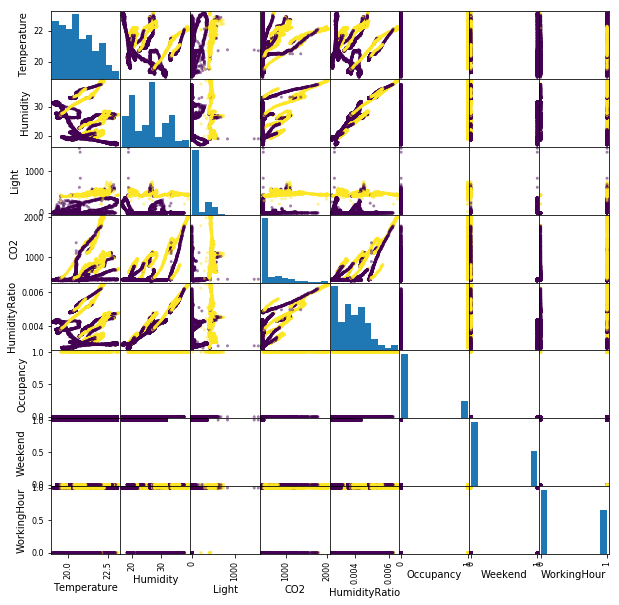

In [51]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[10, 10])
plt.show()

What I conclude from this scenery is that I need light. Humidity ratio and humidity are highly correlated. Also CO2 and humidity ratio together are useless. Temperature with CO2 nor humidity (nor humidity ratio) too do not do well. It seems that light with anything will handle the situation.

Now I want to see time series of every feature. To do so, I need to convert date strings to Python datetime objects. This function should be handy:

In [12]:
def dateOrNotToDate(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')

For changing string dates to Python datetime object, I will write a function that accepts a DataFrame as parameter and iterates through its rows and replaces the string date to datetime object. After writing this function, I may be able to run it with all three of the data sets like following:

In [13]:
def convert_dates(df):
    for i, date in enumerate(df['Date']):
        df.iloc[i, df.columns.get_loc('Date')] = dateOrNotToDate(date)
convert_dates(train)
convert_dates(test1)
convert_dates(test2)

Below, I am plotting every feature in time series:

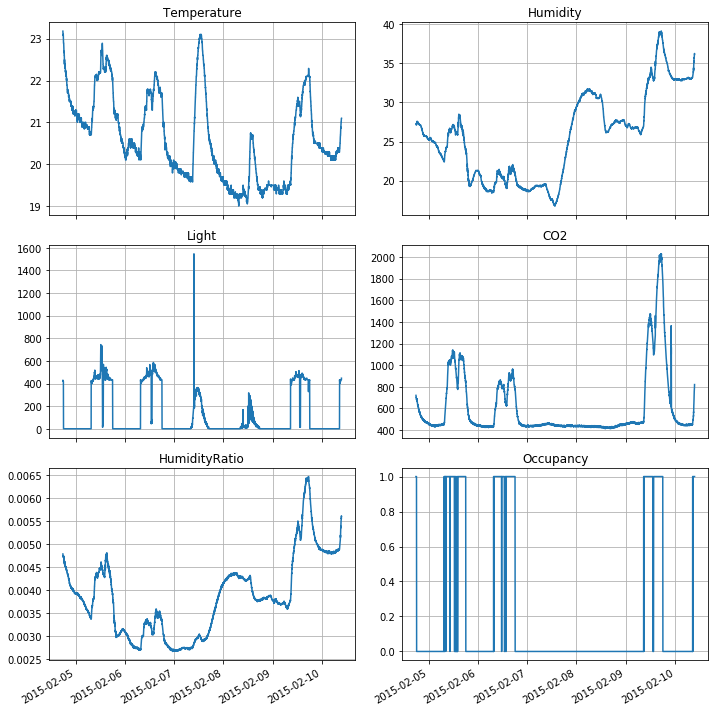

In [14]:
#plt.style.use('ggplot')
for i, col in enumerate(train.columns.values[1:]):
    plt.subplot(3, 2, i+1)
    plt.plot(train['Date'].values.tolist(), train[col].values.tolist(), label=col)
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.autofmt_xdate()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    plt.grid(True)
plt.show()

## Analysing Occupancy

Well... A wide gap between 07-09.02.2015. I wonder if those days are weekend...

In [15]:
days = [
    'Monday',
    'Tuesday', 
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]
seventh_of_feb = datetime.strptime('2015-02-07', '%Y-%m-%d')
print(days[seventh_of_feb.weekday()])

Saturday


Just as I thought. The officers don't visit their place on weekends.

It would be very good if I had the working hours. If I could get the start indices of every day in the dates, I could iterate through days and for every day I could plot occupancy in time series.

To do so, I will store the Date column in a list, and day start indices in another. Iterating through 5 to 10, I will get those dates' start index in the dataset:

In [34]:
date_list = train.Date.values.tolist()
day_start_indices = []
for i in range(5, 11):
    day_start_indices.append(
        date_list.index(
            datetime.strptime(
                '2015-02-' + str(i) + ' 00:00:00',
                '%Y-%m-%d %H:%M:%S'
            )
        )
    )
day_start_indices = [0] + day_start_indices
print(day_start_indices)

[0, 369, 1809, 3249, 4689, 6129, 7569]


So, first 369 rows are from 4th of Feb. Subsequent rows, from 370 to 1808 are from 5th of Feb. etc.

Now, I can readily plot occupancy in time series:

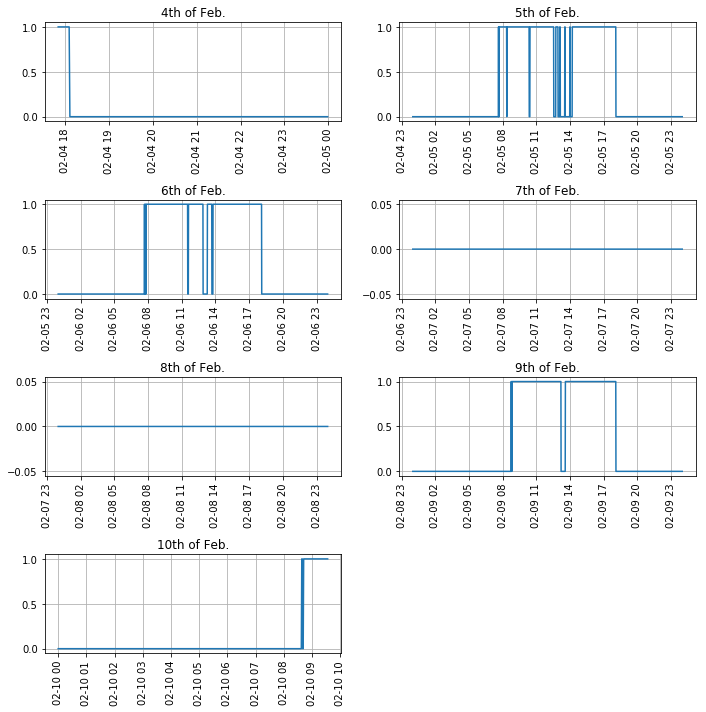

In [17]:
for i in range(len(day_start_indices)):    
    plt.subplot(4, 2, i + 1)
    if i != len(day_start_indices) - 1:
        plt.plot(
            date_list[day_start_indices[i]:day_start_indices[i+1]],
            train['Occupancy'].values.tolist()[
                day_start_indices[i]:day_start_indices[i+1]])
    else:
        plt.plot(
            date_list[day_start_indices[i]:],
            train['Occupancy'].values.tolist()[day_start_indices[i]:])
    plt.title(str(i + 4) + 'th of Feb.')
    plt.grid(True)
    plt.xticks(rotation=90)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.set_size_inches(10, 10)
    fig.tight_layout()
plt.show()

So, what I conclude from these plots is I had better mind the working hours which are --rougly speaking-- between 8am and 6pm. Also there seems to be a lunch break around 1pm. Let me make timing more concrete.

If I print every first and last occurence of occupancy in every days, I think I will get an idea of the working hours for these officers:

In [48]:
print('Daily Work Hours')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print()
for i in range(len(day_start_indices)-1):
    try:
        print('Start:\t', 
              train.loc[(train.Date > date_list[day_start_indices[i]]) &
                        (train.Date < date_list[day_start_indices[i+1]]) &
                        (train.Occupancy == 1), 'Date'].iloc[0])
        print('End:\t',
              train.loc[(train.Date > date_list[day_start_indices[i]]) &
                        (train.Date < date_list[day_start_indices[i+1]]) &
                        (train.Occupancy == 1), 'Date'].iloc[-1])
    except:
        print('No Occupancy')
    print('########################################')
    print()

Daily Work Hours
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Start:	 2015-02-04 17:51:59
End:	 2015-02-04 18:06:00
########################################

Start:	 2015-02-05 07:38:00
End:	 2015-02-05 18:04:00
########################################

Start:	 2015-02-06 07:40:59
End:	 2015-02-06 18:06:00
########################################

No Occupancy
########################################

No Occupancy
########################################

Start:	 2015-02-09 08:44:59
End:	 2015-02-09 18:04:00
########################################



It appears to be that, officers do not come to office before 07:30 and they depart after 18:00.

## Analysing Light

Light seems to be less than 400lx at the weekend. Day light must be illuminating the room atmost 370lx or so. Light follows the same pattern with occupancy. Interesting enough, there is a sudden increase in the lighting at the weekend, possibly on 7th of Feb. Those spots may be outliers.

In [19]:
lighting = train.loc[
    (train.Date > date_list[day_start_indices[3]]) &
    (train.Date < date_list[day_start_indices[4]]) &
    (train.Light > 850),
    ('Date', 'Light')
]
print(lighting)
# May be a lightning?

                     Date        Light
3831  2015-02-07 09:42:00  1546.333333
3832  2015-02-07 09:42:59  1451.750000


(P.S: It was too late when I noticed that I had forgotten to remove outliers. )

## Analysing CO2

CO2 data seems to be very useful, since it also follows occupancy pattern just as light does. Fluctuations can be seen when there is an occupant in the office.

## Conclusion of Analyses 

After exploratory analyses, I decided to add Weekend and WorkingHours as features. To do this, I will, again, write a function to apply the addition to all three of the data sets. For Weekend, as might be expected, I will check if the date is "Saturday or Sunday" or not. If so, then Weekend = 1, else Weekend = 0.

For WorkingHours, if time of the day is between 07:30 and 18:00, then WorkingHours = 1, else WorkingHours = 0.

Firstly I will fill these new columns with 0s. Those which fit the condition will later take their corresponding values.

In [35]:
def add_features(df):
    df.loc[:, 'Weekend'] = 0
    df.loc[:, 'WorkingHour'] = 0

    for i, date in enumerate(df['Date']):
        if (days[date.weekday()] == 'Saturday') or\
            (days[date.weekday()] == 'Sunday'):
            df.iloc[i, df.columns.get_loc('Weekend')] = 1

        if date.time() >= datetime.strptime('07:30', '%H:%M').time() and\
            date.time() <= datetime.strptime('18:00', '%H:%M').time():
            df.iloc[i, df.columns.get_loc('WorkingHour')] = 1

add_features(train)
add_features(test1)
add_features(test2)

After addition of the two features, I will plot the scatter matrix again:

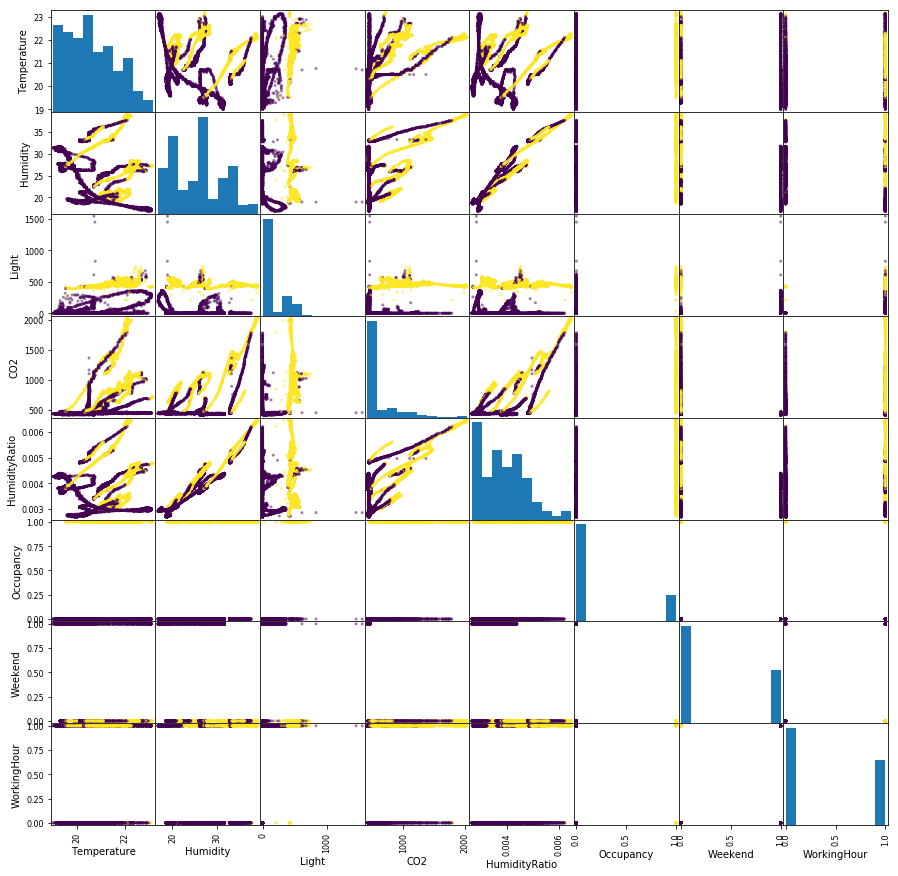

In [36]:
pd.plotting.scatter_matrix(train, c=train['Occupancy'], figsize=[15, 15])
plt.show()

As a result, I think Weekend clearly distinguishes the occupancy. So does the WorkingHour.

Also Weekend and Light together seems to be seperable while Weekend with Humidity seems less helpful. Likewise, WorkingHour with CO2 seems very neat and separable.

# Modeling, Training and Testing

After data analyses, now, I shall extract source and target domains for modeling.

X_train includes all columns except Occupancy of train DataFrame.
X_test1 includes all columns except Occupancy of test1 DataFrame.
X_test2 includes all columns except Occupancy of test2 DataFrame.
And y_* variables are the corresponding target Series.

I am also defining a list of tuples for features. I will use them in testing my models with different feature combinations.

Here, I will present tests for these models:
* Logistic Regression
* Naïve Bayes
* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Gradient Boosting Machine
* Kernelized Support Vector Machine

The general convention I follow for every model is,
1. Import necessary modules.
2. Define hyper parameters space.
3. For every feature combinations in the list mentioned above (and coded below):
  * Make grid search cross-validation.
  * Fit the model and predict against train, test1, and test2 sets.
  * Print classification report.
  
After every model, I presented classification as a table and my conclusions.

In [37]:
X_train = train.drop('Occupancy', axis=1)
y_train = train['Occupancy']

X_test1 = test1.drop('Occupancy', axis=1)
y_test1 = test1['Occupancy']

X_test2 = test2.drop('Occupancy', axis=1)
y_test2 = test2['Occupancy']

features_combs_list = [
    ('Weekend', 'WorkingHour'),
    ('Light', 'CO2'),
    ('WorkingHour', 'CO2'),
    ('CO2', 'Temperature'),
    ('Weekend', 'WorkingHour', 'Light', 'CO2'),
    ('Weekend', 'HumidityRatio'),
]

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

hyper_params_space = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1, 1.2, 1.5],
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]
    
    logit = GridSearchCV(LogisticRegression(), hyper_params_space,
                        scoring='accuracy')
    logit.fit(X, y_train)

    print('Best parameters set:')
    print(logit.best_params_)
    print()
    
    preds = [
        (logit.predict(X), y_train, 'Train'),
        (logit.predict(X_t1), y_test1, 'Test1'),
        (logit.predict(X_t2), y_test2, 'Test2')
    ]
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'random_state': 0, 'penalty': 'l1', 'C': 1}

Train Classification Report:

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      6414
          1       0.84      0.99      0.91      1729

avg / total       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1693
          1       0.91      0.98      0.95       972

avg / total       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.89      0.94      7703
          1       0.71      0.98      0.82      2049

avg / total       0.94      0.91      0.92      9752


Test2 Confusion Matrix:
[[6887  816]
 [  38 2011]]

('Light', 'C

/home/zamma/Desktop/Dersler/Machine_Learning/Data_Mining/minenv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


| Features                         | Hyper Parameters                               | Train | Test1 | Test2 |
|----------------------------------|------------------------------------------------|-------|-------|-------|
| Weekend, WorkingHour             | {'random_state': 0, 'C': 1, 'penalty': 'l1'}   | 0.96  | 0.96  | 0.94  |
| Light, CO2                       | {'random_state': 0, 'C': 1, 'penalty': 'l2'}   | 0.99  | 0.98  | 0.99  |
| WorkingHour, CO2                 | {'random_state': 0, 'C': 1.2, 'penalty': 'l1'} | 0.95  | 0.93  | 0.87  |
| CO2, Temperature                 | {'random_state': 0, 'C': 1.5, 'penalty': 'l1'} | 0.90  | 0.88  | 0.81  |
| Weekend, WorkingHour, Light, CO2 | {'random_state': 0, 'C': 1.5, 'penalty': 'l1'} | 0.99  | 0.98  | 0.99  |
| Weekend, HumidityRatio           | {'random_state': 0, 'C': 1, 'penalty': 'l1'}   | 0.62  | 0.40  | 0.62  |

My two features alone seem to did a good job by catching 94% precision in Test2. Weekend and HumidityRatio together is not a good idea as it seems.

The best are Light-CO2 and Weekend-WorkingHour-Light-CO2. But I am afraid my features here are not very much helpful since Light-CO2 did 99% alone. Altough this accuracy is pleasing, my instincts bother me by saying they are overfitted.

## Naïve Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]
    
    nb = GaussianNB()
    nb.fit(X, y_train)
    
    preds = [
        (nb.predict(X), y_train, 'Train'),
        (nb.predict(X_t1), y_test1, 'Test1'),
        (nb.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2], ':', end=' ')
        print(str((X.shape[0] - (pred[0] != pred[1]).sum()) / X.shape[0]))
    print()
    

('Weekend', 'WorkingHour')
Train : 0.958491956281
Test1 : 0.986859879651
Test2 : 0.895124646936

('Light', 'CO2')
Train : 0.983544148348
Test1 : 0.992508903353
Test2 : 0.988210733145

('WorkingHour', 'CO2')
Train : 0.969175979369
Test1 : 0.984772196979
Test2 : 0.826353923615

('CO2', 'Temperature')
Train : 0.918334766057
Test1 : 0.955790249294
Test2 : 0.767161979614

('Weekend', 'WorkingHour', 'Light', 'CO2')
Train : 0.98722829424
Test1 : 0.990666830406
Test2 : 0.979737197593

('Weekend', 'HumidityRatio')
Train : 0.566007613902
Test1 : 0.792091366818
Test2 : 0.407712145401



| Features                                 | Train  | Test1  | Test2  |
|------------------------------------------|--------|--------|--------|
| 'Weekend', 'WorkingHour'                 | 0.9584 | 0.9868 | 0.8951 |
| 'Light', 'CO2'                           | 0.9835 | 0.9925 | 0.9882 |
| 'WorkingHour', 'CO2'                     | 0.9691 | 0.9847 | 0.8263 |
| 'CO2', 'Temperature'                     | 0.9183 | 0.9557 | 0.7671 |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | 0.9872 | 0.9906 | 0.9797 |
| 'Weekend', 'HumidityRatio'               | 0.5660 | 0.7920 | 0.4077 |

I don't know what to do. Everything looks so underfitting.

## K-Nearest Neighbors 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

hyper_params_space = [
    {
        'n_neighbors': np.arange(1, 50),
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    knn = GridSearchCV(KNeighborsClassifier(), hyper_params_space,
                       scoring='accuracy')
    knn.fit(X, y_train)
    
    print('Best parameters set:')
    print(knn.best_params_)
    print()
    
    preds = [
        (knn.predict(X), y_train, 'Train'),
        (knn.predict(X_t1), y_test1, 'Test1'),
        (knn.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()


('Weekend', 'WorkingHour')
Best parameters set:
{'n_neighbors': 1}

Train Classification Report:

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      6414
          1       0.84      0.99      0.91      1729

avg / total       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1693
          1       0.91      0.98      0.95       972

avg / total       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.89      0.94      7703
          1       0.71      0.98      0.82      2049

avg / total       0.94      0.91      0.92      9752


Test2 Confusion Matrix:
[[6887  816]
 [  38 2011]]

('Light', 'CO2')
Best parameters set:


| Features                                 | Neighbors | Train | Test1 | Test2 |
|------------------------------------------|-----------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | 1         | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | 33        | 0.99  | 0.98  | 0.97  |
| 'WorkingHour', 'CO2'                     | 1         | 0.99  | 0.88  | 0.82  |
| 'CO2', 'Temperature'                     | 49        | 0.93  | 0.86  | 0.79  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | 33        | 0.99  | 0.98  | 0.97  |
| 'Weekend', 'HumidityRatio'               | 46        | 0.88  | 0.59  | 0.73  |

Hopefully there seems no overfitting nor underfitting situation. This table too, making my sadness deeper, shows my new features doesn't help anything at all. Since Light-CO2 again solely hit a 97% on Test2 with 33 neighbors. Same as the version with my features added. But Weekend-WorkingHour alone did not a bad job it appears.

## Decision Tree 

In [39]:
from sklearn.tree import DecisionTreeClassifier

hyper_params_space = [
    {
        'max_depth': np.arange(1, 100),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(DecisionTreeClassifier(), hyper_params_space,
                       scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t1), y_test1, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

# En başarılı sonuç için: print(tree.feature_importances_)


('Weekend', 'WorkingHour')
Best parameters set:
{'max_depth': 2, 'random_state': 0, 'min_samples_split': 2}

Train Classification Report:

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      6414
          1       0.84      0.99      0.91      1729

avg / total       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1693
          1       0.91      0.98      0.95       972

avg / total       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.89      0.94      7703
          1       0.71      0.98      0.82      2049

avg / total       0.94      0.91      0.92      9752


Test2 Confusion Matrix:
[[6887  816]
 [  38 2011]

/home/zamma/Desktop/Dersler/Machine_Learning/Data_Mining/minenv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


| Features                                 | Hyper Paramters                                             | Train | Test1 | Test2 |
|------------------------------------------|-------------------------------------------------------------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | {'min_samples_split': 2, 'max_depth': 2, 'random_state': 0} | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.99  | 0.98  | 0.99  |
| 'WorkingHour', 'CO2'                     | {'min_samples_split': 2, 'max_depth': 3, 'random_state': 0} | 0.98  | 0.96  | 0.89  |
| 'CO2', 'Temperature'                     | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.93  | 0.87  | 0.78  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.99  | 0.98  | 0.99  |
| 'Weekend', 'HumidityRatio'               | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0} | 0.62  | 0.40  | 0.62  |

Again, 99% accuracy is good. But I cannot rest assured that it is not underfitting. It seems the tree didn't need to grow deeper than 3 levels.

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

hyper_params_space = [
    {
        'max_depth': np.arange(1, 100),
        'min_samples_split': np.arange(2, 5),
        'random_state': [0],
        'n_estimators': np.arange(10, 20)
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(RandomForestClassifier(), hyper_params_space,
                       scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t1), y_test1, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

# print(tree.feature_importances_)

('Weekend', 'WorkingHour')
Best parameters set:
{'max_depth': 2, 'random_state': 0, 'n_estimators': 10, 'min_samples_split': 2}

Train Classification Report:

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      6414
          1       0.84      0.99      0.91      1729

avg / total       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1693
          1       0.91      0.98      0.95       972

avg / total       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.89      0.94      7703
          1       0.71      0.98      0.82      2049

avg / total       0.94      0.91      0.92      9752


Test2 Confusion Matrix:
[[688

| Features                                 | Hyper Paramters                                                                 | Train | Test1 | Test2 |
|------------------------------------------|---------------------------------------------------------------------------------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | {'min_samples_split': 2, 'max_depth': 2, 'n_estimators': 10, 'random_state': 0} | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | {'min_samples_split': 2, 'max_depth': 2, 'n_estimators': 18, 'random_state': 0} | 0.99  | 0.98  | 0.99  |
| 'WorkingHour', 'CO2'                     | {'min_samples_split': 2, 'max_depth': 3, 'n_estimators': 10, 'random_state': 0} | 0.98  | 0.96  | 0.89  |
| 'CO2', 'Temperature'                     | {'min_samples_split': 2, 'max_depth': 1, 'n_estimators': 15, 'random_state': 0} | 0.92  | 0.85  | 0.86  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'min_samples_split': 2, 'max_depth': 3, 'n_estimators': 14, 'random_state': 0} | 0.99  | 0.98  | 0.98  |
| 'Weekend', 'HumidityRatio'               | {'min_samples_split': 2, 'max_depth': 1, 'n_estimators': 10, 'random_state': 0} | 0.80  | 0.80  | 0.78  |

With random forest, after 40 minutes of crazy fan sounds getting out of my laptop, the scenery seems to be same as the Decision Tree above. But, interestingly Weekend-Humidity ratio gained much more accuracy than it had in the Decision Tree.

## Gradient Boosting Machine

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

hyper_params_space = [
    {
        'learning_rate': [0.1, 0.01, 0.08],
        'random_state': [0],
        'n_estimators': np.arange(100, 120)
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    gbc = GridSearchCV(GradientBoostingClassifier(), hyper_params_space,
                       scoring='accuracy')
    gbc.fit(X, y_train)
    
    print('Best parameters set:')
    print(gbc.best_params_)
    print()
    
    preds = [
        (gbc.predict(X), y_train, 'Train'),
        (gbc.predict(X_t1), y_test1, 'Test1'),
        (gbc.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()


#print(gbc.feature_importances_)


('Weekend', 'WorkingHour')
Best parameters set:
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}

Train Classification Report:

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      6414
          1       0.84      0.99      0.91      1729

avg / total       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1693
          1       0.91      0.98      0.95       972

avg / total       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.89      0.94      7703
          1       0.71      0.98      0.82      2049

avg / total       0.94      0.91      0.92      9752


Test2 Confusion Matrix:
[[6887  816]
 [  38 20

/home/zamma/Desktop/Dersler/Machine_Learning/Data_Mining/minenv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


| Features                                 | Hyper Paramters                                                 | Train | Test1 | Test2 |
|------------------------------------------|-----------------------------------------------------------------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | {'random_state': 0, 'n_estimators': 100, 'learning_rate': 0.1}  | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | {'random_state': 0, 'n_estimators': 112, 'learning_rate': 0.08} | 0.99  | 0.94  | 0.99  |
| 'WorkingHour', 'CO2'                     | {'random_state': 0, 'n_estimators': 100, 'learning_rate': 0.01} | 0.98  | 0.96  | 0.89  |
| 'CO2', 'Temperature'                     | {'random_state': 0, 'n_estimators': 111, 'learning_rate': 0.01} | 0.93  | 0.69  | 0.77  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'random_state': 0, 'n_estimators': 110, 'learning_rate': 0.1}  | 0.99  | 0.94  | 0.98  |
| 'Weekend', 'HumidityRatio'               | {'random_state': 0, 'n_estimators': 105, 'learning_rate': 0.01} | 0.84  | 0.40  | 0.62  |

Again, no significant change. But this model together with random forest, reinforces the accuracy values achieved by Decision Tree.

In this case Weekend-Humidity ratio appears to be overfitted.

## Kernelized SVM

In [32]:
from sklearn.svm import SVC

hyper_params_space = [
    {
        'kernel': ['linear'],
        'random_state': [0]
    },
    {
        'kernel': ['rbf'],
        'gamma': np.arange(2, 5),
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test1.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    svc = GridSearchCV(SVC(), hyper_params_space,
                       scoring='accuracy')
    svc.fit(X, y_train)
    
    print('Best parameters set:')
    print(svc.best_params_)
    print()
    
    preds = [
        (svc.predict(X), y_train, 'Train'),
        (svc.predict(X_t1), y_test1, 'Test1'),
        (svc.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Weekend', 'WorkingHour')
Best parameters set:
{'random_state': 0, 'kernel': 'linear'}

Train Classification Report:

             precision    recall  f1-score   support

          0       1.00      0.95      0.97      6414
          1       0.84      0.99      0.91      1729

avg / total       0.96      0.96      0.96      8143


Train Confusion Matrix:
[[6096  318]
 [  20 1709]]

Test1 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1693
          1       0.91      0.98      0.95       972

avg / total       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1602   91]
 [  16  956]]

Test2 Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.89      0.94      7703
          1       0.71      0.98      0.82      2049

avg / total       0.94      0.91      0.92      9752


Test2 Confusion Matrix:
[[6887  816]
 [  38 2011]]

('Light', 'CO2')


/home/zamma/Desktop/Dersler/Machine_Learning/Data_Mining/minenv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


| Features                                 | Hyper Paramters                         | Train | Test1 | Test2 |
|------------------------------------------|-----------------------------------------|-------|-------|-------|
| 'Weekend', 'WorkingHour'                 | {'random_state': 0, 'kernel': 'linear'} | 0.96  | 0.96  | 0.94  |
| 'Light', 'CO2'                           | {'random_state': 0, 'kernel': 'linear'} | 0.99  | 0.98  | 0.99  |
| 'WorkingHour', 'CO2'                     | {'random_state': 0, 'kernel': 'linear'} | 0.96  | 0.94  | 0.86  |
| 'CO2', 'Temperature'                     | {'random_state': 0, 'kernel': 'linear'} | 0.92  | 0.86  | 0.84  |
| 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'random_state': 0, 'kernel': 'linear'} | 0.99  | 0.98  | 0.98  |
| 'Weekend', 'HumidityRatio'               | {'random_state': 0, 'kernel': 'linear'} | 0.62  | 0.40  | 0.62  |

Firstly, all kernel parameters resulted as "linear". Light-CO2 seems to hitted a good accuracy but, I believe Weekend-WorkingHour-Light-CO2 is more reliable. Because the former may had become underfit.

## Conclusion 

| Model                     | Features                                 | Parameters                                                                      | Training Accuracy | Test1 Accuracy | Test2 Accuracy |
|---------------------------|------------------------------------------|---------------------------------------------------------------------------------|-------------------|----------------|----------------|
| Logistic Regression       | 'Light', 'CO2'                           | {'random_state': 0, 'C': 1.5, 'penalty': 'l1'}                                  | 0.99              | 0.98           | 0.99           |
| Naïve Bayes               | 'Weekend', 'WorkingHour', 'Light', 'CO2' |                                                                                 | 0.98              | 0.99           | 0.97           |
| K-Nearest Neighbors       | 'Light', 'CO2'                           | {'n_neighbors': 33}                                                             | 0.99              | 0.98           | 0.97           |
| Decision Tree             | 'Light', 'CO2'                           | {'min_samples_split': 2, 'max_depth': 1, 'random_state': 0}                     | 0.99              | 0.98           | 0.99           |
| Random Forest             | 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'min_samples_split': 2, 'max_depth': 3, 'n_estimators': 14, 'random_state': 0} | 0.99              | 0.98           | 0.98           |
| Gradient Boosting Machine | 'Weekend', 'WorkingHour', 'Light', 'CO2' | {'random_state': 0, 'n_estimators': 110, 'learning_rate': 0.1}                  | 0.99              | 0.94           | 0.98           |
| Kernelized SVM            | 'Light', 'CO2'                           | {'random_state': 0, 'kernel': 'linear'}                                         | 0.99              | 0.98           | 0.99           |

All in all, all models in general did a great job mostly using Light-CO2 alone. Only in some rare circumstances, my features was of help, little they may be though.

(In fact, this table is scaring me. I cannot be sure whether I have interpreted the results correctly or not. ^^;)